In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Exploratory Data Analysis

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
df.drop(['Row ID','Order ID','Customer ID','Customer Name','Product ID','Product Name'],axis=1,inplace=True)
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,3.7980
9796,12/01/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,10.3680
9797,12/01/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,26.3760


In [11]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Category         0
Sub-Category     0
Sales            0
dtype: int64

In [12]:
df.dropna(inplace=True)
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,3.7980
9796,12/01/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,10.3680
9797,12/01/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,26.3760


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Date Difference'] = df['Ship Date'] - df['Order Date']

In [14]:
df['Date Difference'] = df['Date Difference'].dt.days
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Date Difference
0,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,3
1,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3
2,2017-06-12,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.6200,4
3,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,7
4,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,22.3680,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,3.7980,7
9796,2016-01-12,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,10.3680,5
9797,2016-01-12,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,235.1880,5
9798,2016-01-12,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,26.3760,5


In [15]:
df_city_sales=df[["City","Sales"]]
df_city_sales.groupby(["City"]).sum()

,Sales
City,
Aberdeen,25.500
Abilene,1.392
Akron,2724.244
Albuquerque,2220.160
Alexandria,5519.570
...,...
Woonsocket,195.550
Yonkers,7657.666
York,817.978


In [16]:
df.drop(['Postal Code'],axis=1,inplace=True)

In [17]:
df['OrderDatePeriodDay'] = df['Order Date'].dt.to_period("D")
df['OrderDatePeriodMonth'] = df['Order Date'].dt.to_period("M")
df['OrderDatePeriodYear'] = df['Order Date'].dt.to_period("Y")
df['OrderDatePeriodWeek'] = df['Order Date'].dt.to_period("W")

In [18]:
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Date Difference,OrderDatePeriodDay,OrderDatePeriodMonth,OrderDatePeriodYear,OrderDatePeriodWeek
0,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,3,2017-11-08,2017-11,2017,2017-11-06/2017-11-12
1,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,2017-11-08,2017-11,2017,2017-11-06/2017-11-12
2,2017-06-12,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,4,2017-06-12,2017-06,2017,2017-06-12/2017-06-18
3,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,7,2016-10-11,2016-10,2016,2016-10-10/2016-10-16
4,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,7,2016-10-11,2016-10,2016,2016-10-10/2016-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,3.7980,7,2017-05-21,2017-05,2017,2017-05-15/2017-05-21
9796,2016-01-12,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,East,Office Supplies,Art,10.3680,5,2016-01-12,2016-01,2016,2016-01-11/2016-01-17
9797,2016-01-12,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,East,Technology,Phones,235.1880,5,2016-01-12,2016-01,2016,2016-01-11/2016-01-17
9798,2016-01-12,2016-01-17,Standard Class,Corporate,United States,Toledo,Ohio,East,Technology,Phones,26.3760,5,2016-01-12,2016-01,2016,2016-01-11/2016-01-17


In [19]:
df.sort_values(by='Order Date',inplace=True)
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Date Difference,OrderDatePeriodDay,OrderDatePeriodMonth,OrderDatePeriodYear,OrderDatePeriodWeek
7980,2015-01-03,2015-01-07,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Paper,16.448,4,2015-01-03,2015-01,2015,2014-12-29/2015-01-04
741,2015-01-04,2015-01-08,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Binders,3.540,4,2015-01-04,2015-01,2015,2014-12-29/2015-01-04
740,2015-01-04,2015-01-08,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Storage,272.736,4,2015-01-04,2015-01,2015,2014-12-29/2015-01-04
739,2015-01-04,2015-01-08,Standard Class,Home Office,United States,Naperville,Illinois,Central,Office Supplies,Labels,11.784,4,2015-01-04,2015-01,2015,2014-12-29/2015-01-04
1759,2015-01-05,2015-01-12,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Art,19.536,7,2015-01-05,2015-01,2015,2015-01-05/2015-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2018-12-30,2019-01-03,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Bookcases,323.136,4,2018-12-30,2018-12,2018,2018-12-24/2018-12-30
908,2018-12-30,2019-01-03,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Binders,52.776,4,2018-12-30,2018-12,2018,2018-12-24/2018-12-30
907,2018-12-30,2019-01-03,Standard Class,Consumer,United States,New York City,New York,East,Technology,Phones,90.930,4,2018-12-30,2018-12,2018,2018-12-24/2018-12-30
1296,2018-12-30,2019-01-03,Standard Class,Corporate,United States,Fairfield,California,West,Office Supplies,Binders,13.904,4,2018-12-30,2018-12,2018,2018-12-24/2018-12-30


In [20]:
df_sales_per_date=df[['OrderDatePeriodMonth','Sales']].groupby('OrderDatePeriodMonth').sum()
df_sales_per_date

,Sales
OrderDatePeriodMonth,
2015-01,14205.7070
2015-02,4519.8920
2015-03,55205.7970
2015-04,27906.8550
2015-05,23644.3030
2015-06,34322.9356
2015-07,33781.5430
2015-08,27117.5365
2015-09,81623.5268


<Axes: title={'center': 'Sales'}, xlabel='Order Date'>

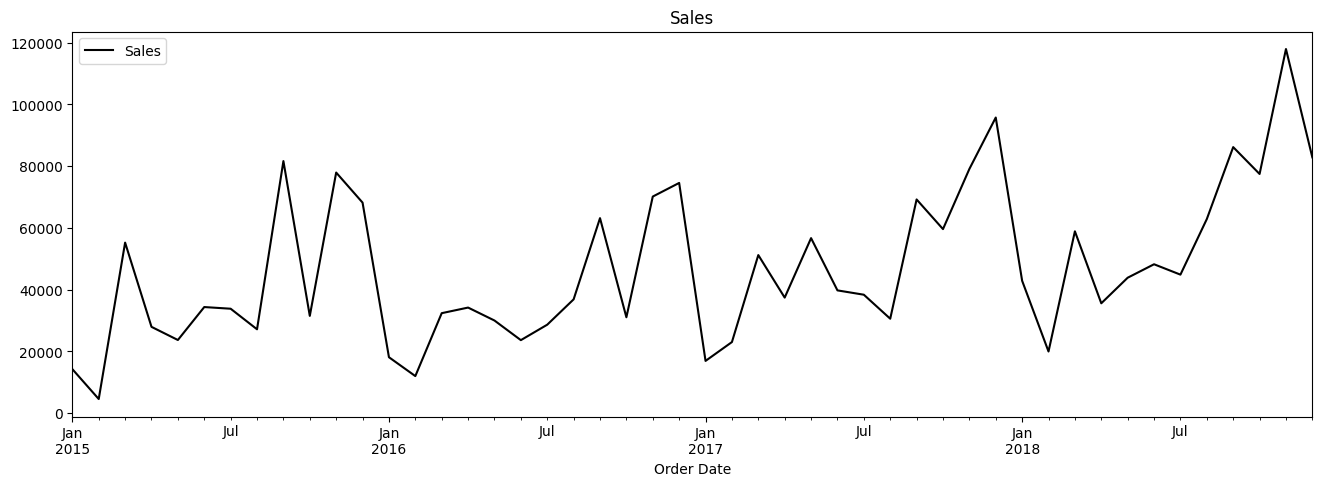

In [21]:
df_sales_per_date.plot(kind='line',y='Sales',xlabel='Order Date',title="Sales",figsize=(16,5),color = "black")

In [22]:
df_sales_per_date

,Sales
OrderDatePeriodMonth,
2015-01,14205.7070
2015-02,4519.8920
2015-03,55205.7970
2015-04,27906.8550
2015-05,23644.3030
2015-06,34322.9356
2015-07,33781.5430
2015-08,27117.5365
2015-09,81623.5268


#Using SARIMAX

In [23]:
df_train = df_sales_per_date[df_sales_per_date.index <= pd.to_datetime("2018-01-01", format='%Y-%m-%d').to_period("M")]
df_test = df_sales_per_date[df_sales_per_date.index >= pd.to_datetime("2018-01-01", format='%Y-%m-%d').to_period("M")]

In [24]:
df_train.index = df_train.index.to_timestamp()
df_test.index = df_test.index.to_timestamp()

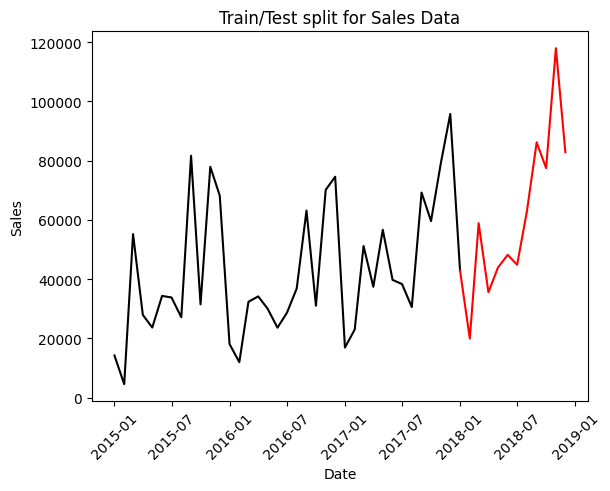

In [25]:
import matplotlib.pyplot as plt
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.rcParams["figure.figsize"] = (16,5)
plt.show()

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
y=df_train['Sales']

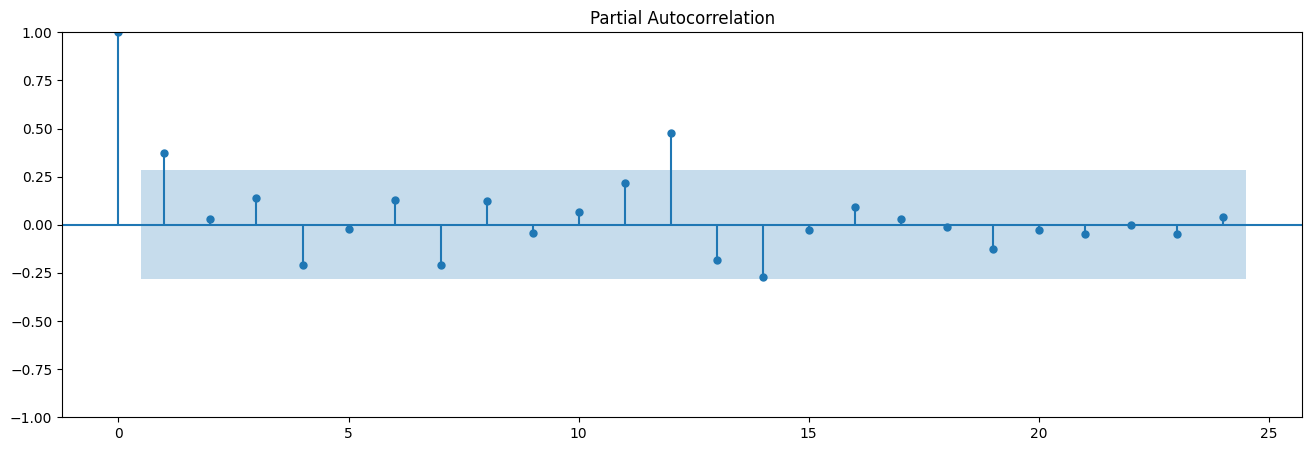

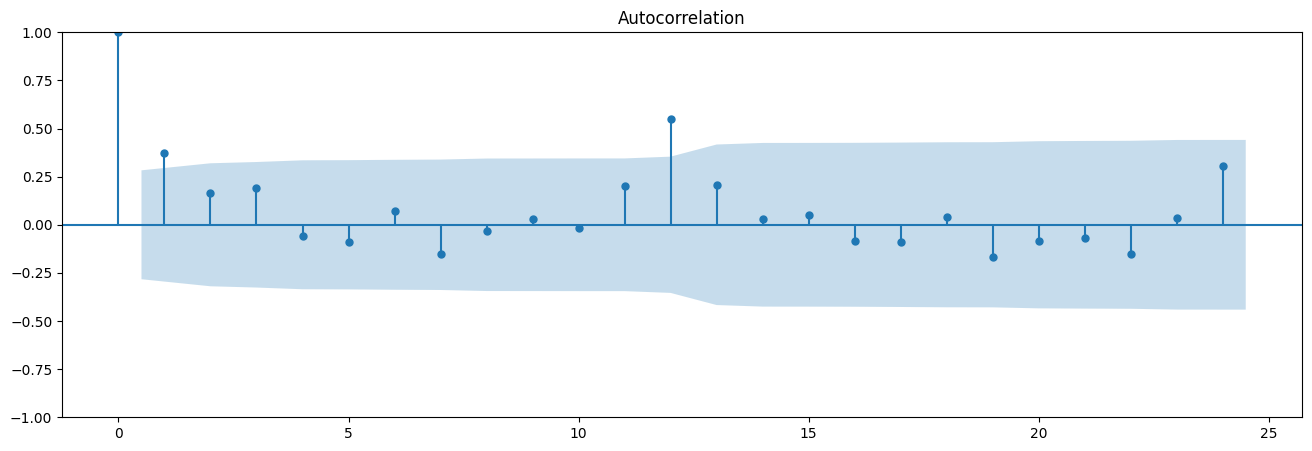

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf_plot = plot_pacf(df_sales_per_date['Sales'], lags=24)
acf_plot = plot_acf(df_sales_per_date['Sales'], lags=24)

In [29]:
SARIMAXmodel = SARIMAX(y, seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [30]:
y_pred = SARIMAXmodel.get_forecast(len(df_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df["Predictions"]

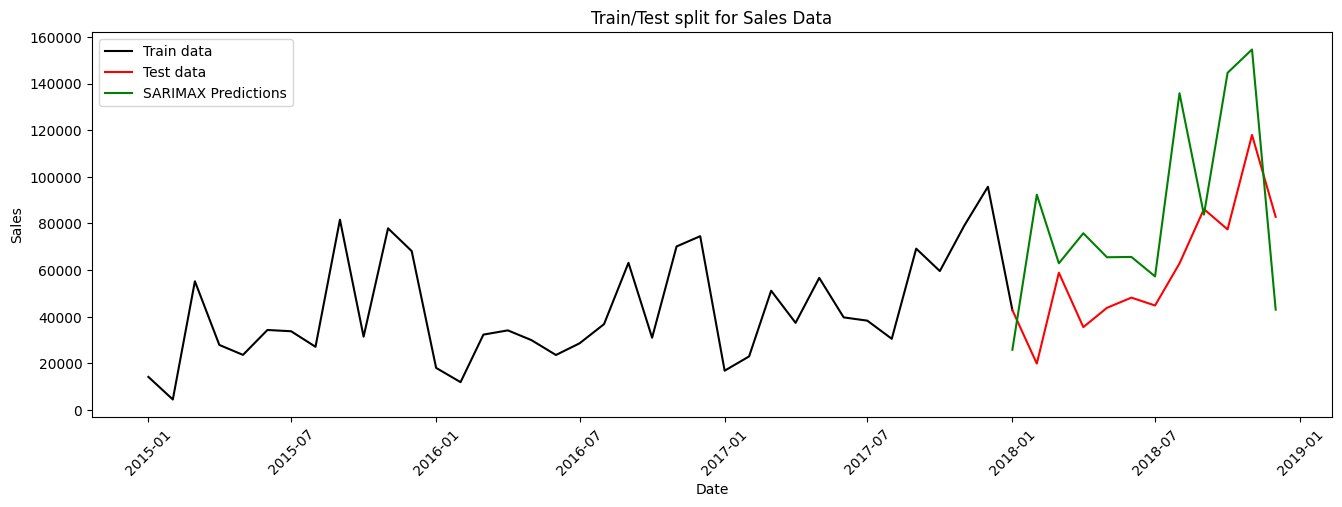

In [31]:
plt.plot(df_train, color = 'black', label = 'Train data')
plt.plot(df_test, color = 'red',label='Test data')
plt.plot(y_pred_out, color='green', label = 'SARIMAX Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.rcParams["figure.figsize"] = (16,5)
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test, y_pred_out)
rmse = np.sqrt(mse)
rmse

41704.0536151331

In [33]:
def nrmse(actual, predicted):
  """ Normalized Root Mean Squared Error """
  mse = mean_squared_error(actual, predicted)
  rmse = np.sqrt(mse)
  nrmse = rmse / (actual.max() - actual.min())
  return nrmse

nrmse_value = nrmse(df_test, y_pred_out)
nrmse_value

Sales    0.425477
dtype: float64

In [34]:
df_test.mean()

Sales    60100.817433
dtype: float64

#Using LSTM's

In [35]:
train = df_sales_per_date.iloc[:36]
test = df_sales_per_date.iloc[36:]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sales_per_date.head(),df_sales_per_date.tail()

(                          Sales
 OrderDatePeriodMonth           
 2015-01               14205.707
 2015-02                4519.892
 2015-03               55205.797
 2015-04               27906.855
 2015-05               23644.303,
                             Sales
 OrderDatePeriodMonth             
 2018-08                62837.8480
 2018-09                86152.8880
 2018-10                77448.1312
 2018-11               117938.1550
 2018-12                82825.3588)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'train' Series to a 2D array
train_reshaped = train.values.reshape(-1, 1)

# Fit the scaler to the reshaped training data
scaler.fit(train_reshaped)

# Transform the training and testing data
scaled_train = scaler.transform(train_reshaped)
# Also reshape test data before transforming
scaled_test = scaler.transform(test.values.reshape(-1, 1))

scaled_train[:10]

array([[0.10618172],
       [0.        ],
       [0.55564935],
       [0.25638194],
       [0.20965328],
       [0.32671887],
       [0.3207838 ],
       [0.24772896],
       [0.84525637],
       [0.29526122]])

In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [113]:
n_input = 17
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [115]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [116]:
model.fit(generator,epochs=800)

Epoch 1/800
19/19 [==============================] - 17s 10ms/step - loss: 0.1476
Epoch 2/800
19/19 [==============================] - 0s 11ms/step - loss: 0.0642
Epoch 3/800
19/19 [==============================] - 0s 10ms/step - loss: 0.0564
Epoch 4/800
19/19 [==============================] - 0s 11ms/step - loss: 0.0575
Epoch 5/800
19/19 [==============================] - 0s 10ms/step - loss: 0.0591
Epoch 6/800
19/19 [==============================] - 0s 15ms/step - loss: 0.0539
Epoch 7/800
19/19 [==============================] - 0s 11ms/step - loss: 0.0564
Epoch 8/800
19/19 [==============================] - 0s 10ms/step - loss: 0.0603
Epoch 9/800
19/19 [==============================] - 0s 10ms/step - loss: 0.0538
Epoch 10/800
19/19 [==============================] - 0s 11ms/step - loss: 0.0546
Epoch 11/800
19/19 [==============================] - 0s 11ms/step - loss: 0.0530
Epoch 12/800
19/19 [==============================] - 0s 10ms/step - loss: 0.0541
Epoch 13/800
19/19 [====

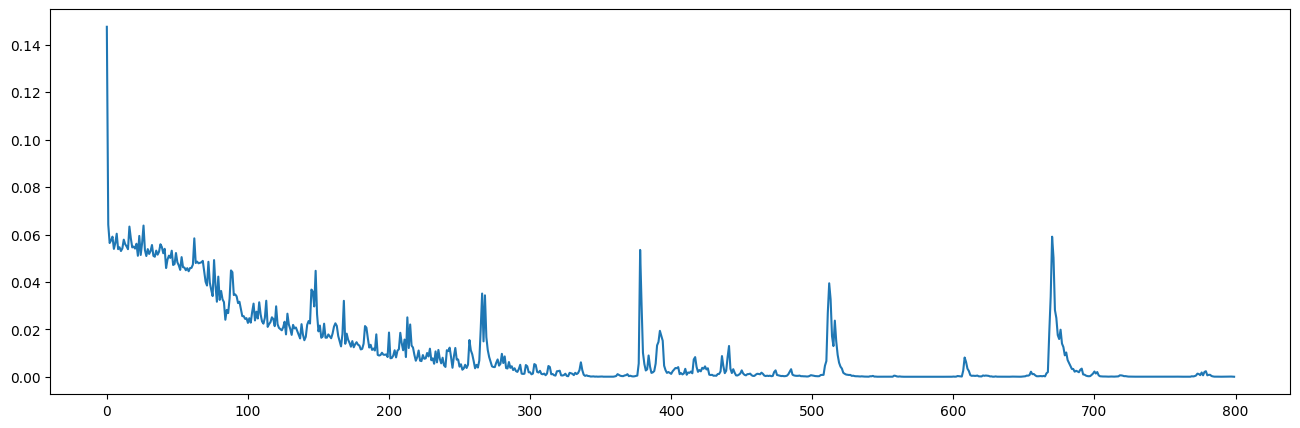

In [117]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [118]:
last_train_batch = scaled_train[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 247ms/step


array([[1.018896]], dtype=float32)

In [119]:
scaled_test[0]

array([0.42008031])

In [120]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


test_predictions

1/1 [==============================] - 0s 22ms/step


[array([1.018896], dtype=float32),
 array([0.37638438], dtype=float32),
 array([0.78148776], dtype=float32),
 array([0.7321701], dtype=float32),
 array([0.7621336], dtype=float32),
 array([0.6555854], dtype=float32),
 array([0.60763216], dtype=float32),
 array([0.48526996], dtype=float32),
 array([0.6495495], dtype=float32),
 array([0.80260324], dtype=float32),
 array([1.2178347], dtype=float32),
 array([1.4980414], dtype=float32)]

<ipython-input-121-47d57d781971>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='OrderDatePeriodMonth'>

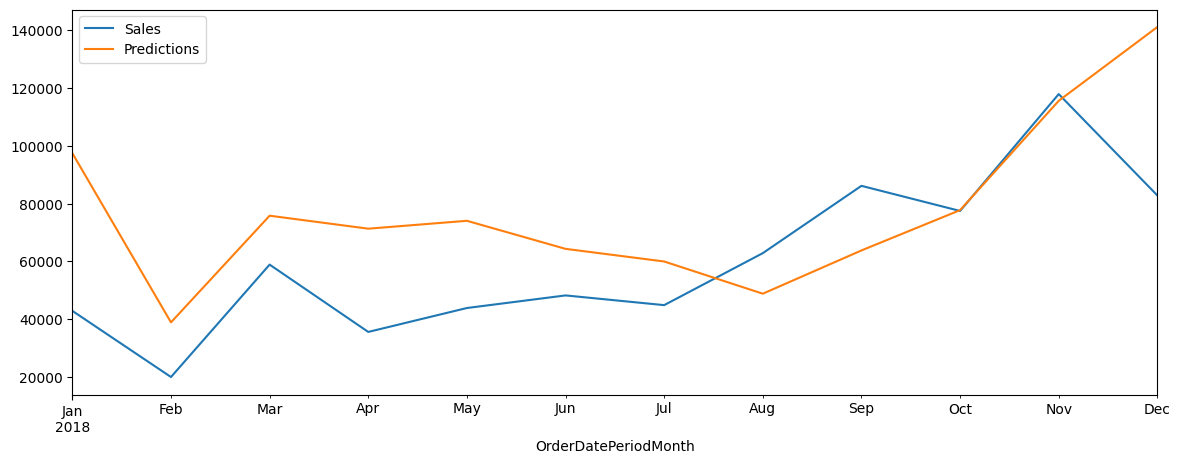

In [121]:
# Convert the list of arrays to a flat NumPy array
true_predictions = np.array(test_predictions).flatten()

# Inverse transform the predictions to get the original scale
true_predictions = scaler.inverse_transform(true_predictions.reshape(-1, 1)).flatten()

# Assign the flattened array to the 'Predictions' column
test['Predictions'] = true_predictions

# Plot the results
test.plot(figsize=(14,5))

In [122]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Sales'], test['Predictions'])
rmse = np.sqrt(mse)
print("RMSE:", rmse)

def nrmse(actual, predicted):
  """ Normalized Root Mean Squared Error """
  mse = mean_squared_error(actual, predicted)
  rmse = np.sqrt(mse)
  nrmse = rmse / (actual.max() - actual.min())
  return nrmse

nrmse_value = nrmse(test['Sales'], test['Predictions'])
print("NRMSE:", nrmse_value)

RMSE: 29465.09648420371
NRMSE: 0.3006116194926643
